In [1]:
import networkx as nx
import math
import random
from matplotlib import pyplot

In [2]:
def dijkstra(g: nx.Graph, source):
    for node in g.nodes:
        g.nodes[node]['distance'] = math.inf
        g.nodes[node]['predecessor'] = None
    
    q = set(g.nodes)
    g.nodes[source]['distance'] = 0
    
    while q:
        u = min(q, key=lambda x: g.nodes[x]['distance'])
        q.remove(u)
        
        for v in g.neighbors(u):
            try:
                alt = g.nodes[u]['distance'] + g.edges[u, v]['weight']
            except:
                alt = g.nodes[u]['distance']
            if alt < g.nodes[v]['distance']:
                g.nodes[v]['distance'] = alt
                g.nodes[v]['predecessor'] = u
    
    return [(node, g.nodes[node]['predecessor']) for node in g.nodes.keys() if g.nodes[node]['predecessor'] is not None]


In [3]:
def randomized_graph(num_nodes, edge_density, weight_range) -> nx.Graph:
    graph = nx.Graph()
    graph.add_nodes_from(range(num_nodes), distance=math.inf, predecessor=None)
    
    nodes = list(graph.nodes)
    num_edges = round((num_nodes + 1) * num_nodes / 2 * edge_density)
    i = 0
    while i < num_edges:
        u, v = random.choices(nodes, k=2)
        if not graph.has_edge(u, v):
            graph.add_edge(u, v, weight=random.randint(*weight_range))
            i += 1
    return graph


In [4]:
# g: nx.Graph = randomized_graph(10, 0.5, (1, 100))
# pos = nx.spring_layout(g)
g: nx.Graph = nx.random_geometric_graph(30, .25)
for node in g.nodes:
    g.nodes[node]['distance'] = math.inf
    g.nodes[node]['predecessor'] = None
for edge in g.edges:
    g.edges[edge]['weight'] = random.randint(1, 100)
pos = {node: g.nodes[node]['pos'] for node in g.nodes}
# pos = nx.draw_spring(g)

In [5]:
start = random.choice(list(g.nodes))
end = random.choice(list(g.nodes))
while start == end:
    end = random.choice(list(g.nodes))

In [6]:
def plot(graph, pos, start, end, *, highlight_edges=None, highlight_nodes=None, changed_edge=None, labels=True):
    figure = pyplot.figure(dpi=300, figsize=(10, 10))
    
    not_start=g.nodes - {start, end}
    nx.draw(g, pos, node_color='orange', nodelist=not_start, node_size=300)
    
    nx.draw_networkx_nodes(g, pos, node_color='green', nodelist=[start], node_size=600, node_shape='s')
    nx.draw_networkx_nodes(g, pos, node_color='lightblue', nodelist=[end], node_size=600, node_shape='^')
    
    if labels:
        node_labels = {node: (node, g.nodes[node]['distance'], g.nodes[node]['predecessor']) for node in g.nodes}
        nx.draw_networkx_labels(g, pos, labels=node_labels)

        edge_labels = {edge: g.edges[edge]['weight'] for edge in g.edges}
        nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)

    if highlight_edges is not None:
        nx.draw_networkx_edges(g, pos, edge_color='red', edgelist=highlight_edges, width=2)
#         highlighted_nodes = set(i for j in highlight for i in j) - {start, end}
#         nx.draw_networkx_nodes(g, pos, node_color='red', nodelist=highlighted_nodes, node_size=600)
    if highlight_nodes is not None:
        nx.draw_networkx_nodes(g, pos, node_color='cyan', nodelist=highlight_nodes, node_size=600)
    if changed_edge is not None:
        nx.draw_networkx_edge_labels(g, pos, edge_labels={changed_edge: g.edges[changed_edge]['weight']}, font_color='red', font_weight='bold')
#     figure.show()

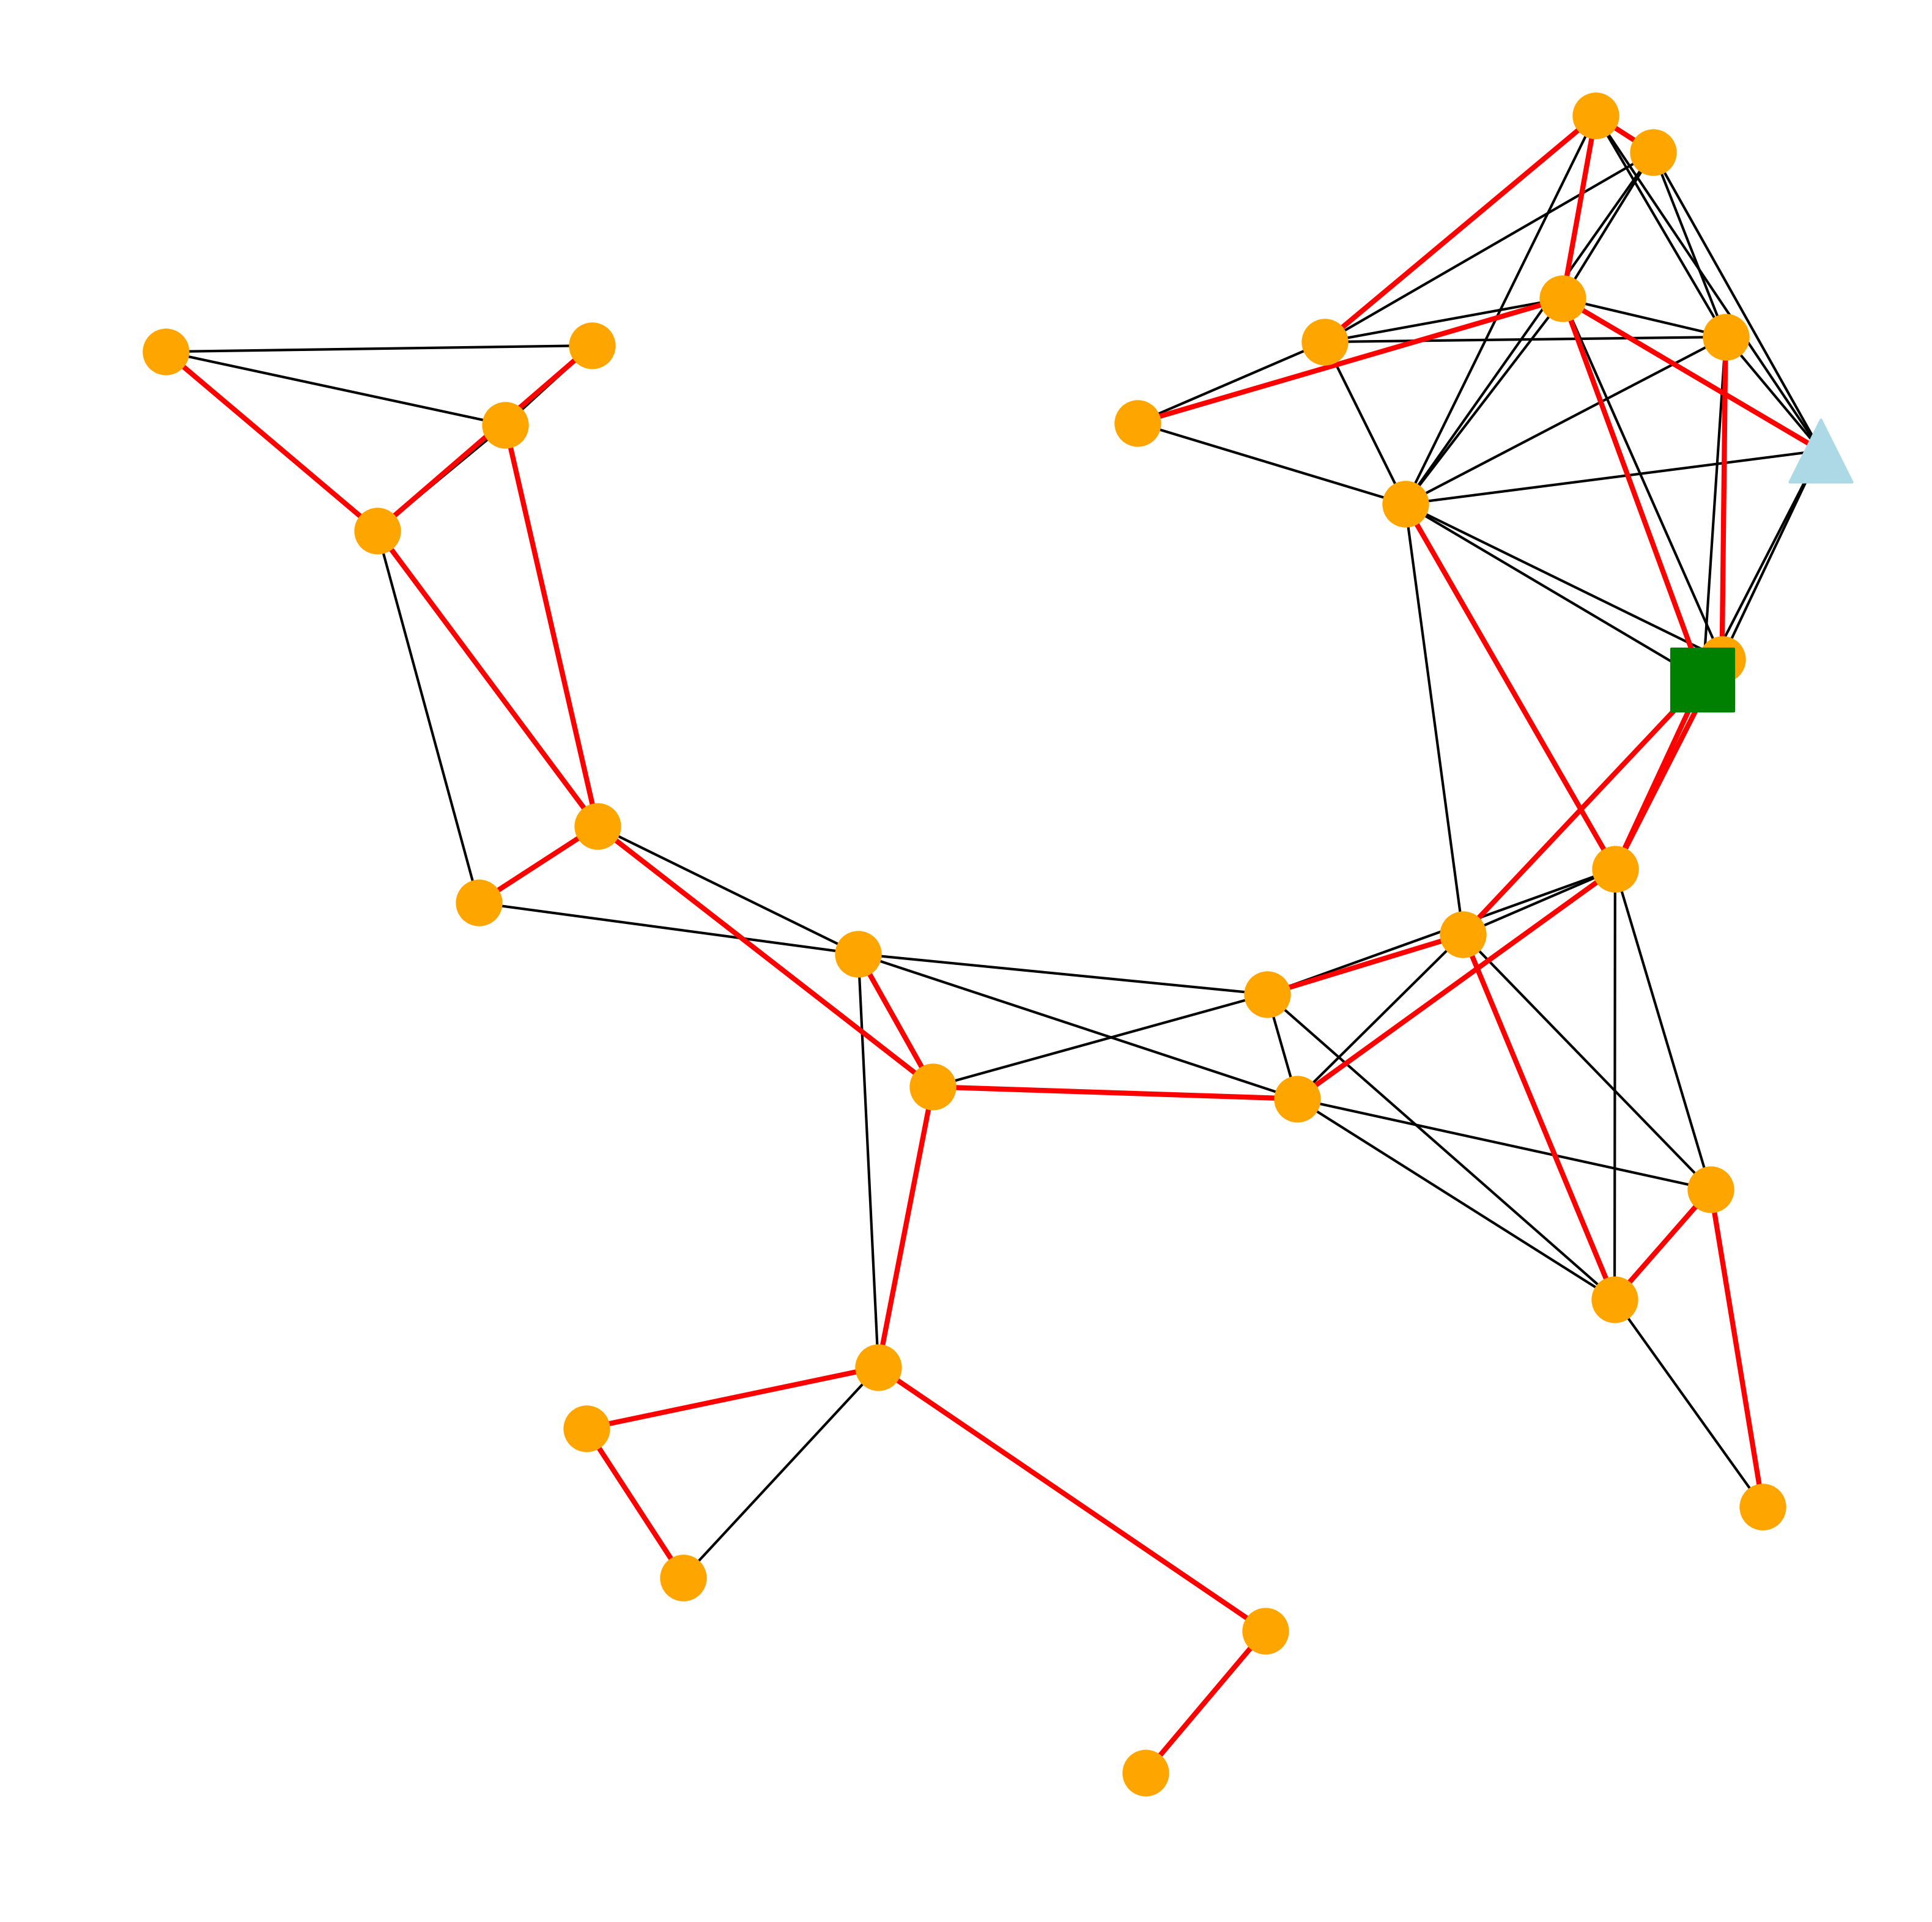

In [7]:
dijkstra_tree = dijkstra(g, start)
plot(g, pos, start, end, highlight_edges=dijkstra_tree, labels=len(g.nodes) <= 25)

In [8]:
def find_path(graph, tree, start, end):
    """
    follows the tree to try to get from start to end, and returns the path they used.
    """
    stack = [(start, [start])]
    while stack:
        v, path = stack.pop()
        for u in set(graph.neighbors(v)) - set(path):
            if (u, v) in tree or (v, u) in tree:
                if u == end:
                    path.append(u)
                    return [(i,j) for i,j in zip(path[:-1], path[1:])]
                else:
                    stack.append((u, path + [u]))

    
    
    

In [9]:
path = find_path(g, dijkstra_tree, start, end)

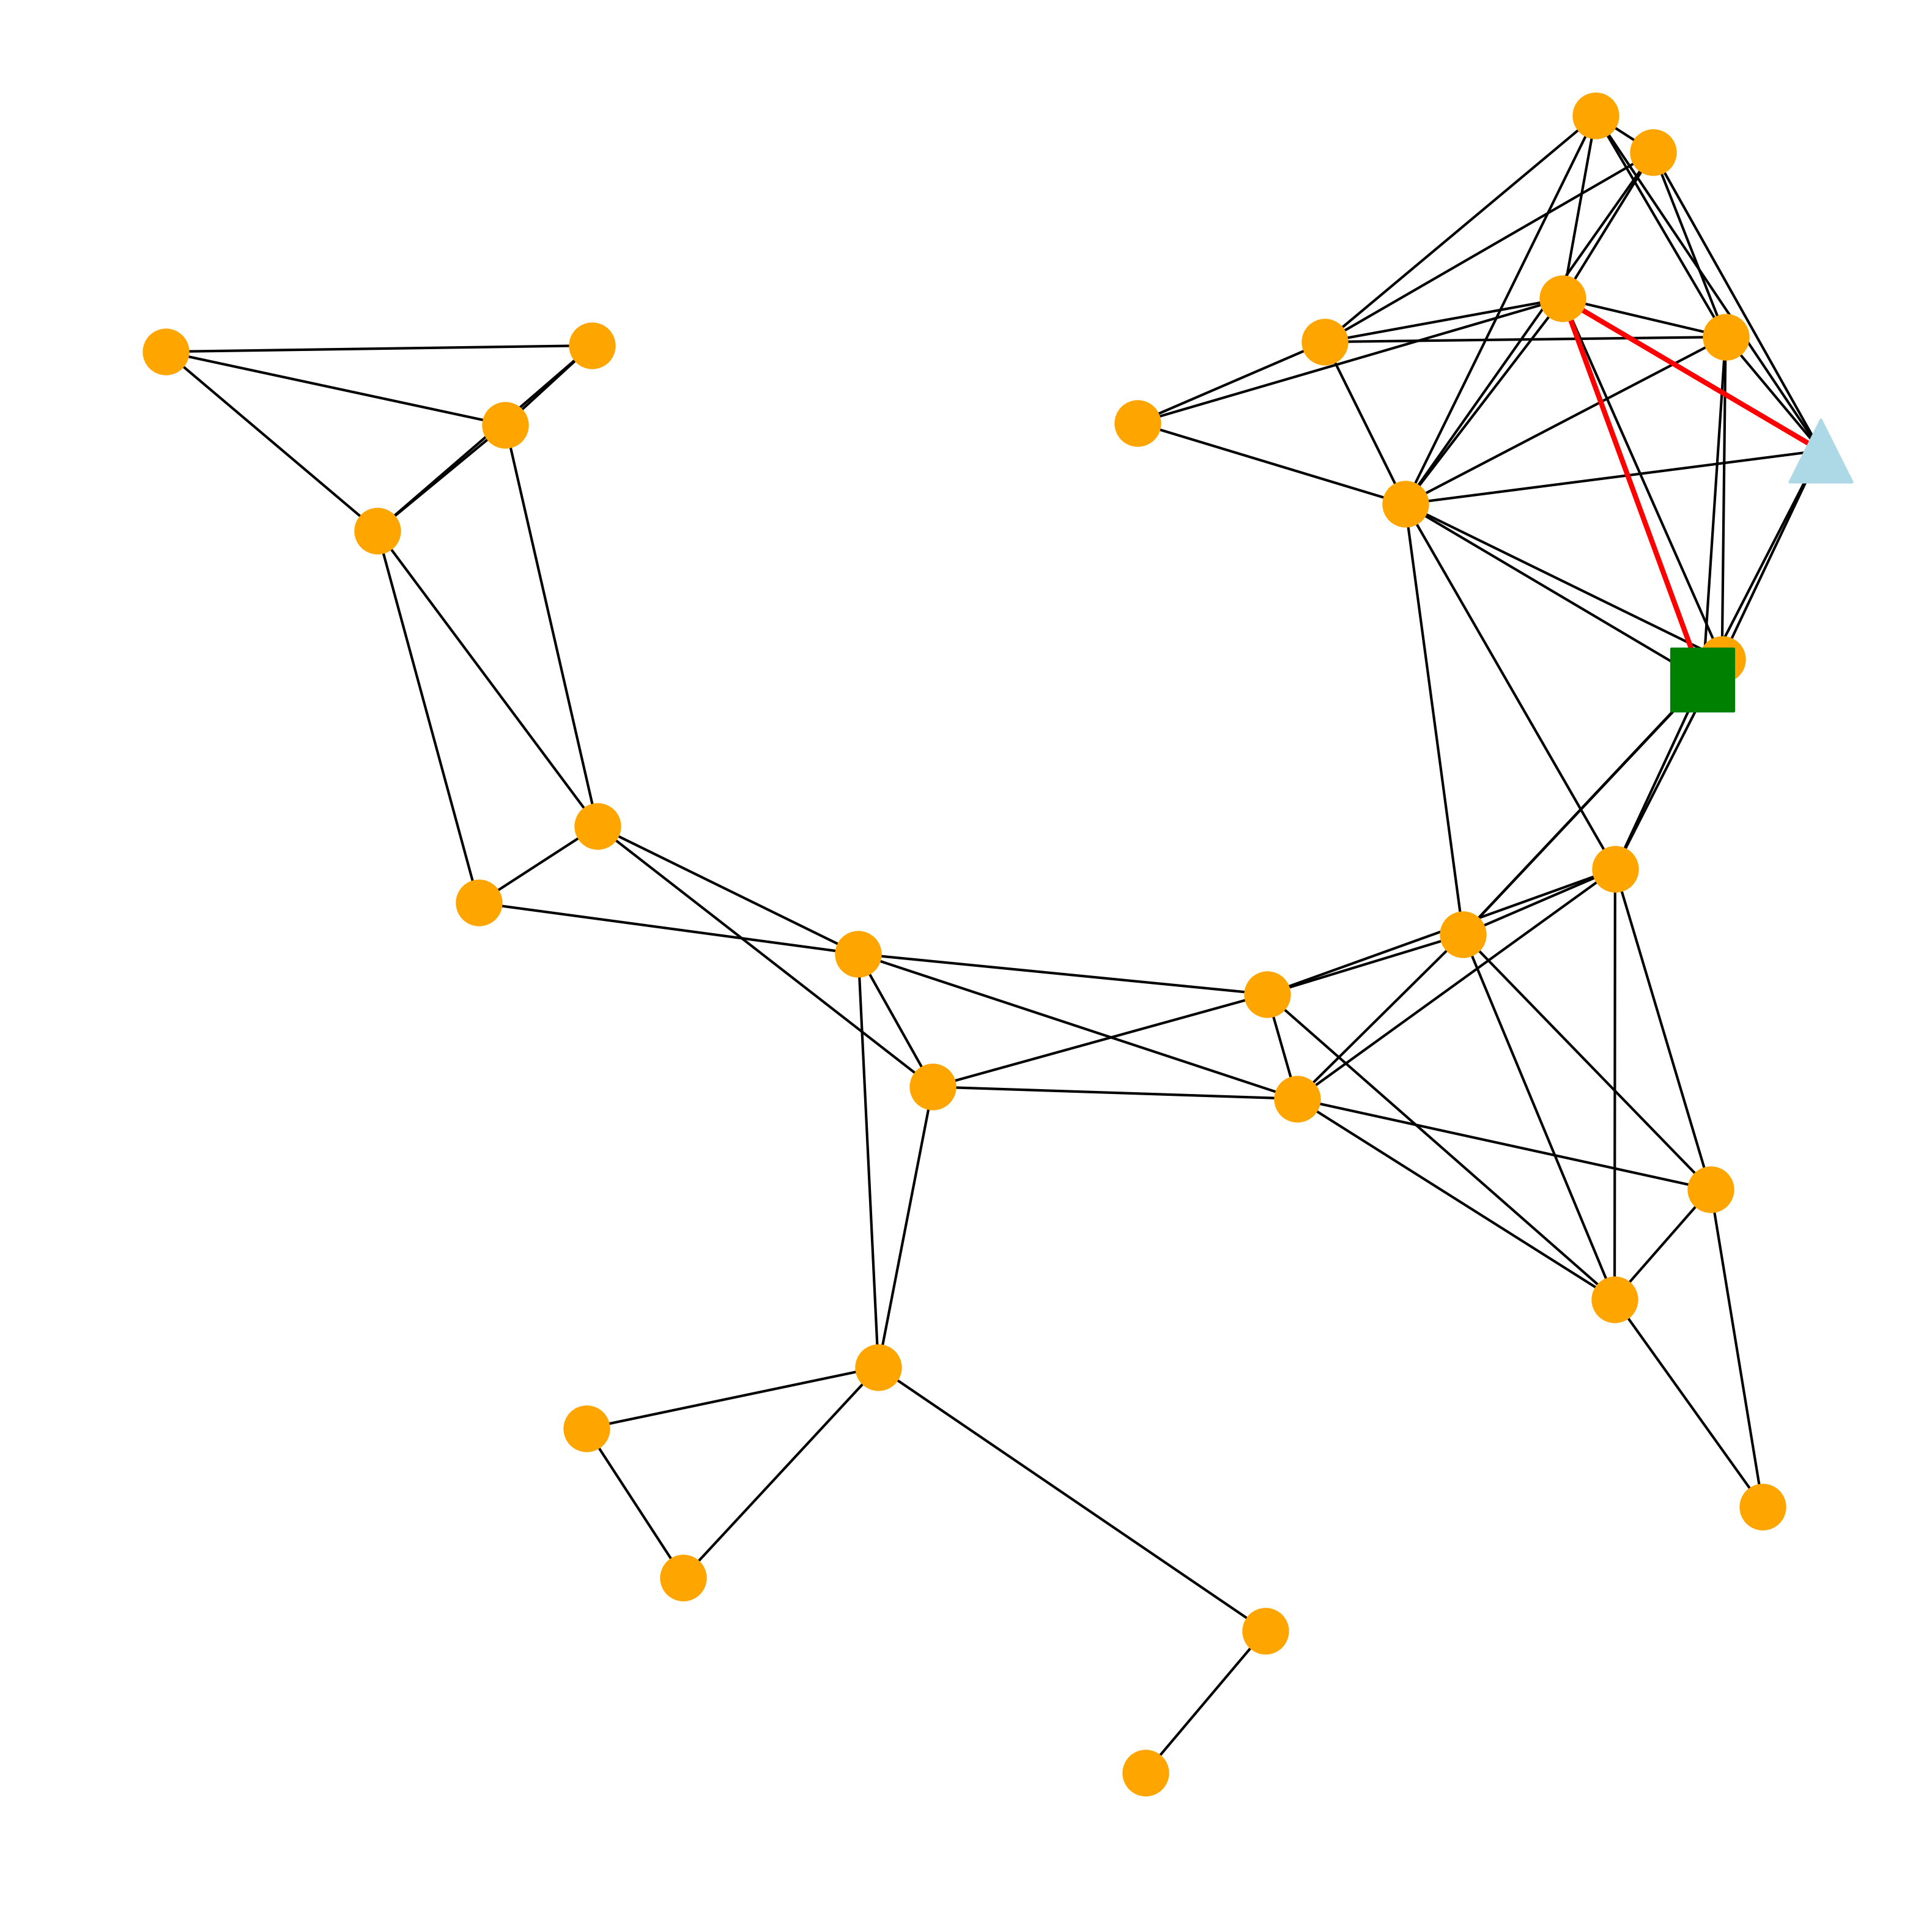

In [10]:
plot(g, pos, start, end, highlight_edges=path, labels=len(g.nodes) <= 25)

In [11]:
def random_weight_change(graph, weight_range=(1, 100)):
    edges = list(graph.edges)
    edge = random.choice(edges)
    old_weight = graph.edges[edge]['weight']
    new_weight = random.randint(*weight_range)
    graph.edges[edge]['weight'] = new_weight
    return edge, old_weight, new_weight

In [28]:
current = start

In [30]:
while current != end:
    dijkstra_tree = dijkstra(g, current)
    path = find_path(g, dijkstra_tree, current, end)
    plot(g, pos, start, end, highlight_edges=path, highlight_nodes=[current], labels=len(g.nodes) <= 25)
    current = path[0][1]
    print(path)
    print(current)
    pyplot.show()